In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import datetime
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
df = pd.read_csv("compressed_by_hour.csv")

In [3]:
df.head()

,Unnamed: 0,RideStart,maxTemp,totalRidesPerHour,weekday,workingday,month,hour,NightTime,calendarWeek,season,precip
0,0,2018-01-01 00:00:00,13.9,56,0,1,1,0,1,1,4,0
1,1,2018-01-01 01:00:00,13.3,43,0,1,1,1,1,1,4,0
2,2,2018-01-01 02:00:00,12.2,33,0,1,1,2,1,1,4,0
3,3,2018-01-01 03:00:00,11.1,11,0,1,1,3,1,1,4,0
4,4,2018-01-01 04:00:00,11.1,1,0,1,1,4,1,1,4,0


Drop unwanted column

In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace= True)
df.head()

,RideStart,maxTemp,totalRidesPerHour,weekday,workingday,month,hour,NightTime,calendarWeek,season,precip
0,2018-01-01 00:00:00,13.9,56,0,1,1,0,1,1,4,0
1,2018-01-01 01:00:00,13.3,43,0,1,1,1,1,1,4,0
2,2018-01-01 02:00:00,12.2,33,0,1,1,2,1,1,4,0
3,2018-01-01 03:00:00,11.1,11,0,1,1,3,1,1,4,0
4,2018-01-01 04:00:00,11.1,1,0,1,1,4,1,1,4,0


# We wanted to try to include all variables into one regression:

In [5]:
df = df.drop(columns = ["RideStart"]) # dropping the date column
df

,maxTemp,totalRidesPerHour,weekday,workingday,month,hour,NightTime,calendarWeek,season,precip
0,13.9,56,0,1,1,0,1,1,4,0
1,13.3,43,0,1,1,1,1,1,4,0
2,12.2,33,0,1,1,2,1,1,4,0
3,11.1,11,0,1,1,3,1,1,4,0
4,11.1,1,0,1,1,4,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...
8270,11.1,99,6,0,12,20,0,52,4,0
8271,11.7,91,6,0,12,21,0,52,4,0
8272,12.8,55,6,0,12,22,0,52,4,0
8273,13.3,43,6,0,12,23,1,52,4,0


Change the order of the columns

In [6]:
df = df.reindex(columns =['hour', 'month', 'calendarWeek', 'NightTime', 'maxTemp', 'season', 'precip', 
                          'workingday','weekday', 'totalRidesPerHour'  ])
df

,hour,month,calendarWeek,NightTime,maxTemp,season,precip,workingday,weekday,totalRidesPerHour
0,0,1,1,1,13.9,4,0,1,0,56
1,1,1,1,1,13.3,4,0,1,0,43
2,2,1,1,1,12.2,4,0,1,0,33
3,3,1,1,1,11.1,4,0,1,0,11
4,4,1,1,1,11.1,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
8270,20,12,52,0,11.1,4,0,0,6,99
8271,21,12,52,0,11.7,4,0,0,6,91
8272,22,12,52,0,12.8,4,0,0,6,55
8273,23,12,52,1,13.3,4,0,0,6,43


Normalizing the temperature with a Min-Max-Normalization

In [7]:
df["maxTemp"] = MinMaxScaler().fit_transform(np.array(df["maxTemp"]).reshape(-1,1))
df["maxTemp"]


0       0.463333
1       0.443333
2       0.406667
3       0.370000
4       0.370000
          ...   
8270    0.370000
8271    0.390000
8272    0.426667
8273    0.443333
8274    0.463333
Name: maxTemp, Length: 8275, dtype: float64

Creating our test and training sets and defining the independent variable vector x and the dependent varable (totalRidesPerHour) y.

In [8]:
x=df.drop(['totalRidesPerHour'],axis=1)
y=df['totalRidesPerHour']


Performing the test-split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 35)

## Linear Regression

In [10]:
linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predicted = linearRegressor.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 50120.59471249578
R score: 0.28470759769888676
Mean Absolute Error: 149.85699530845406


In [11]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)
model = LinearRegression()
model.fit(x_poly, y_train)
y_predicted_p = model.predict(x_poly_test)
mse = mean_squared_error(y_test, y_predicted_p)
r = r2_score(y_test, y_predicted_p)
mae = mean_absolute_error(y_test,y_predicted_p)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 108252173.17016864
R score: -1543.9129733071813
Mean Absolute Error: 325.5681139374109


## Decision Tree

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 2)
regressor.fit(x_train, y_train)
y_predicted_d = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_predicted_d)
r = r2_score(y_test, y_predicted_d)
mae = mean_absolute_error(y_test,y_predicted_d)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
#tree.plot_tree(regressor) 

Mean Squared Error: 21806.333870318165
R score: 0.6887925007882791
Mean Absolute Error: 61.16431735803464


### Visualize feature importance

Feature: 0, Score: 0.68238
Feature: 1, Score: 0.02189
Feature: 2, Score: 0.13565
Feature: 3, Score: 0.00015
Feature: 4, Score: 0.04007
Feature: 5, Score: 0.00505
Feature: 6, Score: 0.00338
Feature: 7, Score: 0.00162
Feature: 8, Score: 0.10982


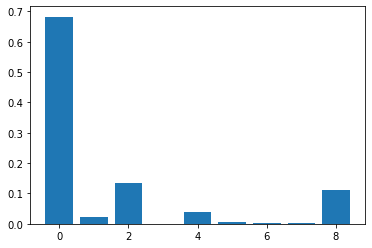

In [13]:
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.savefig("featureImportance.pdf")
plt.show()

In [14]:
names = ["precip", 'temperature',"weekday","workingday",'month',"hour","NightTime","calendarWeek","season"] # needed for plotting the decision tree

### Random Forest

In [15]:
# NEEDS AT LEAST 15GB FREE RAM 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)
rf.fit(x_train,y_train);
y_predicted_r = rf.predict(x_test)
mse = mean_squared_error(y_test, y_predicted_r)
r = r2_score(y_test, y_predicted_r)
mae = mean_absolute_error(y_test,y_predicted_r)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 31472.0302053967
R score: 0.5508492223597077
Mean Absolute Error: 81.89488521949255


Combining all of these values of R², we can conclude by saying that a decision tree regression is the best fit for our dataset when we include all given variables in our model

### Neural Networks

In [16]:
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [17]:
df_Beta = df
df_Beta

,hour,month,calendarWeek,NightTime,maxTemp,season,precip,workingday,weekday,totalRidesPerHour
0,0,1,1,1,0.463333,4,0,1,0,56
1,1,1,1,1,0.443333,4,0,1,0,43
2,2,1,1,1,0.406667,4,0,1,0,33
3,3,1,1,1,0.370000,4,0,1,0,11
4,4,1,1,1,0.370000,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
8270,20,12,52,0,0.370000,4,0,0,6,99
8271,21,12,52,0,0.390000,4,0,0,6,91
8272,22,12,52,0,0.426667,4,0,0,6,55
8273,23,12,52,1,0.443333,4,0,0,6,43


Train-test split

In [18]:
train_size = int(len(df_Beta) * 0.9)
test_size = len(df_Beta) - train_size
train, test = df_Beta.iloc[0:train_size], df_Beta.iloc[train_size:len(df_Beta)]
print(len(train), len(test))

7447 828


In [19]:
f_columns = ['maxTemp']

f_transformer = MinMaxScaler() #rescale to be sure
cnt_transformer = MinMaxScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['totalRidesPerHour']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['totalRidesPerHour'] = cnt_transformer.transform(train[['totalRidesPerHour']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['totalRidesPerHour'] = cnt_transformer.transform(test[['totalRidesPerHour']])

In [20]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [21]:
time_steps = 10

X_train, y_train = create_dataset(train, train.totalRidesPerHour, time_steps)
X_test, y_test = create_dataset(test, test.totalRidesPerHour, time_steps)

print(X_train.shape, y_train.shape)

(7437, 10, 10) (7437,)


In [22]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)

model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
210/210 [==============================] - 6s 13ms/step - loss: 0.0564 - val_loss: 0.0110
Epoch 2/30
210/210 [==============================] - 2s 11ms/step - loss: 0.0179 - val_loss: 0.0090
Epoch 3/30
210/210 [==============================] - 2s 10ms/step - loss: 0.0125 - val_loss: 0.0090
Epoch 4/30
210/210 [==============================] - 2s 10ms/step - loss: 0.0094 - val_loss: 0.0079
Epoch 5/30
210/210 [==============================] - 2s 10ms/step - loss: 0.0085 - val_loss: 0.0073
Epoch 6/30
210/210 [==============================] - 2s 10ms/step - loss: 0.0072 - val_loss: 0.0088
Epoch 7/30
210/210 [==============================] - 2s 10ms/step - loss: 0.0069 - val_loss: 0.0086
Epoch 8/30
210/210 [==============================] - 2s 11ms/step - loss: 0.0060 - val_loss: 0.0082
Epoch 9/30
210/210 [==============================] - 2s 10ms/step - loss: 0.0062 - val_loss: 0.0086
Epoch 10/30
210/210 [==============================] - 2s 11ms/step - loss: 0.0055 - val_lo

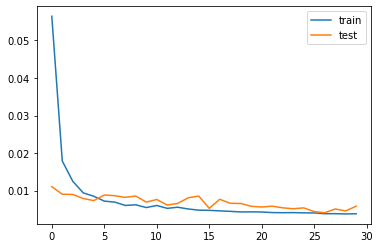

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

Now we would like to see how our model predictions perform in comparison to the "real" data.

In [26]:
y_pred = model.predict(X_test)

26/26 [==============================] - 1s 4ms/step


In [27]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

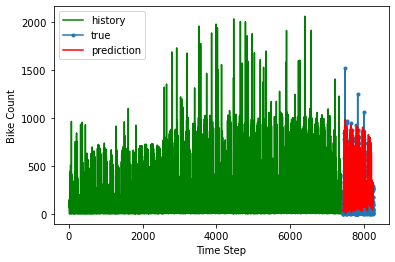

In [28]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

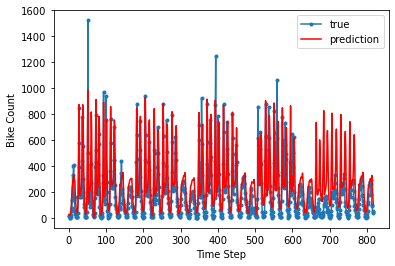

In [29]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();